In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 

In [3]:
data = pd.read_csv('churn-bigml-80.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True)

In [6]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})

In [8]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   int64  
 3   Number vmail messages   2666 non-null   int64  
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve minutes       2666 non-null   float64
 8   Total eve calls         2666 non-null   int64  
 9   Total eve charge        2666 non-null   float64
 10  Total night minutes     2666 non-null   float64
 11  Total night calls       2666 non-null   int64  
 12  Total night charge      2666 non-null   float64
 13  Total intl minutes      2666 non-null   float64
 14  Total intl calls        2666 non-null   

In [9]:
y = data['Churn'].astype('int')

In [10]:
X = data.drop('Churn', axis=1)

In [12]:
X.shape, y.shape

((2666, 17), (2666,))

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [17]:
X_train.shape, X_valid.shape

((1866, 17), (800, 17))

In [19]:
first_tree = DecisionTreeClassifier(random_state=17)

In [20]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.91176471, 0.89008043, 0.90348525, 0.89544236, 0.88203753])

In [21]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.8965620564579719

In [22]:
np.median(cross_val_score(first_tree, X_train, y_train, cv=5))

0.8954423592493298

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
first_knn = KNeighborsClassifier()

In [25]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8713767544551333

##Настраиваем максимальную глубину для дерева

In [27]:
from sklearn.model_selection import GridSearchCV

In [39]:
knn_params = {'n_neighbors': [1, 2, 3, 4] + list(range(50, 100, 10))}

In [40]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5, n_jobs=-1)

In [33]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features': np.array([0.5, 0.7, 1])}

In [34]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [36]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: user 410 ms, sys: 22.5 ms, total: 433 ms
Wall time: 2.11 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([0.5, 0.7, 1. ])})

In [38]:
tree_grid.best_score_, tree_grid.best_params_

(0.9271207581253316, {'max_depth': 7, 'max_features': 0.5})

In [41]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 290 ms, sys: 41 ms, total: 331 ms
Wall time: 3.45 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 50, 60, 70, 80, 90]})

In [42]:
knn_grid.best_score_, knn_grid.best_params_

(0.8681624636205931, {'n_neighbors': 4})

In [43]:
knn_params2 = {'n_neighbors': list(range(5, 30, 5))}

In [44]:
knn_grid = GridSearchCV(first_knn, knn_params2, cv=5, n_jobs=-1)

In [45]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 118 ms, sys: 4.58 ms, total: 122 ms
Wall time: 756 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25]})

In [46]:
knn_grid.best_score_, knn_grid.best_params_

(0.8761981907069434, {'n_neighbors': 10})

In [47]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=0.5, random_state=17)

In [50]:
tree_valid_pred = tree_grid.predict(X_valid)

In [51]:
tree_grid.score(X_valid, y_valid)

0.9325

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_valid, tree_valid_pred)

0.9325

In [55]:
1 - np.mean(y)

0.854463615903976

In [56]:
from sklearn.tree import export_graphviz

In [59]:
export_graphviz(tree_grid.best_estimator_, out_file='telecom_tree',
                feature_names=X.columns, filled=True)

In [60]:
X.columns

Index(['Account length', 'Area code', 'International plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

In [66]:
!ls -l *.png

-rw-r--r-- 1 root root 0 Aug 23 14:14 tree.png


In [73]:
!dot -Tpng /content/telecom_tree -o tree.png

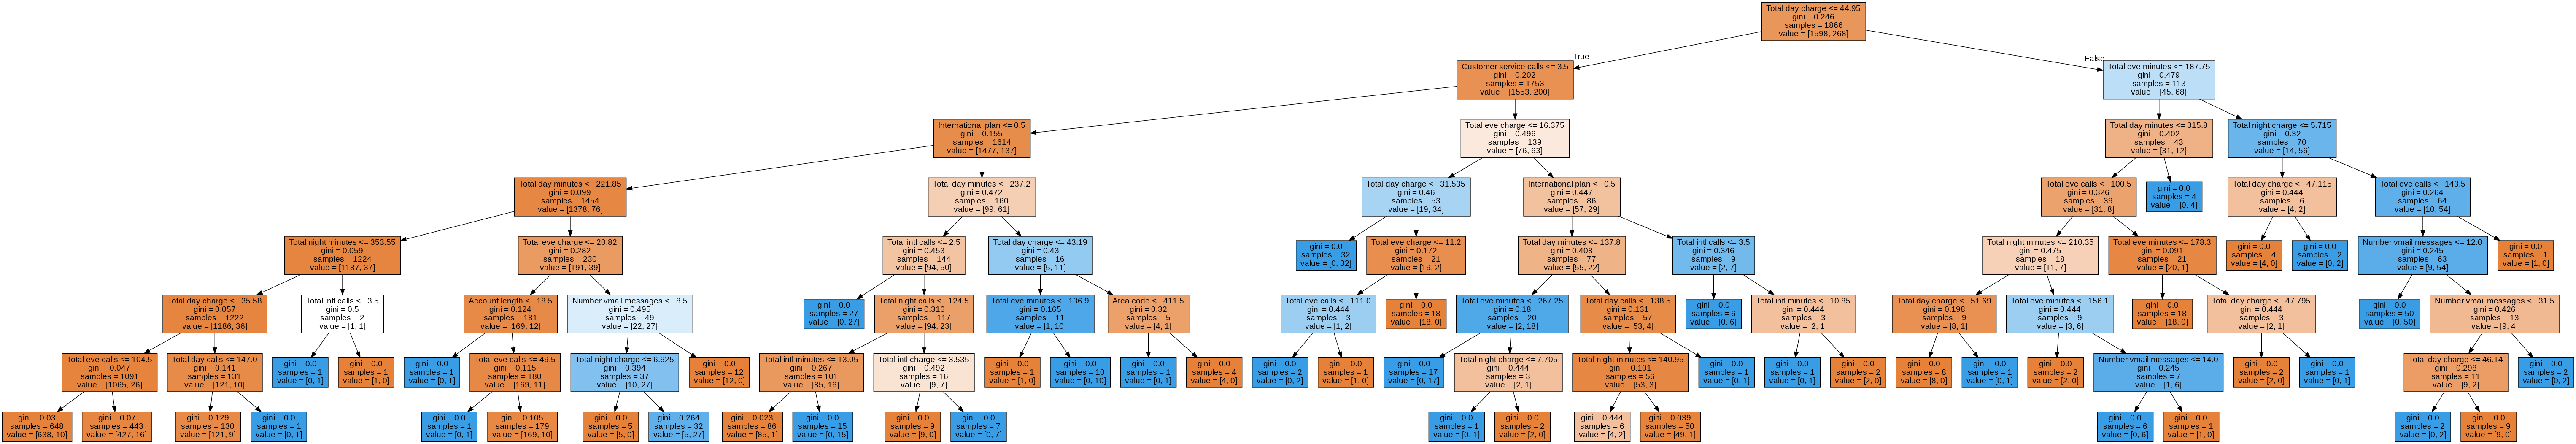

In [74]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.8925

In [77]:
export_graphviz(second_tree, out_file='telecom_tree2',
                feature_names=X.columns, filled=True)

In [78]:
!ls -l *.png

-rw-r--r-- 1 root root 626594 Aug 23 14:21 tree.png


In [80]:
!dot -Tpng /content/telecom_tree -o tree2.png

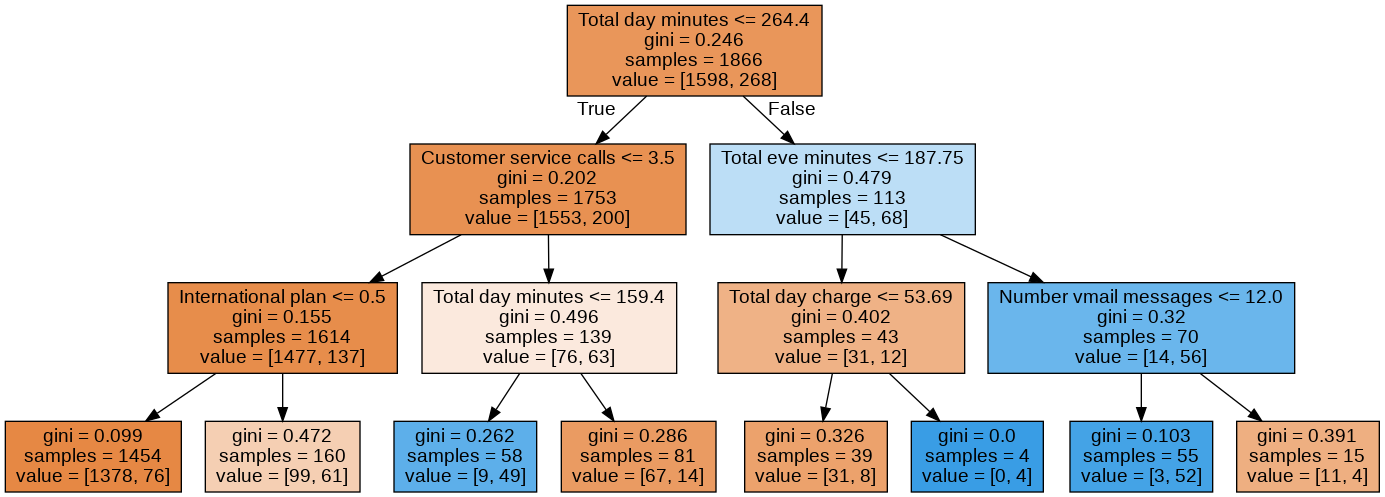